In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm

In [5]:
est_df = pd.read_csv("./ESTIMATE_Results.csv")
est_df.rename(columns={"sample":"CGGA_ID"},inplace=True)
res_df = pd.read_csv("../CGGA_Validation_Results/CGGA_Results_RS-20.csv")
res_df.drop(columns=["Unnamed: 0"],inplace=True)

In [12]:
est_df

,CGGA_ID,stromal,immune,estimate,purity
0,CGGA_1002,-1272.110359,-603.617096,-1875.727455,0.946155
1,CGGA_1003,-2000.595911,-1223.895849,-3224.491760,0.991344
2,CGGA_1010,-1716.357429,-1048.780713,-2765.138141,0.980246
3,CGGA_1012,-464.032148,183.687650,-280.344498,0.845211
4,CGGA_1014,-1214.144802,-363.833213,-1577.978015,0.931108
...,...,...,...,...,...
688,CGGA_P87,-872.191137,295.467878,-576.723259,0.867655
689,CGGA_P89,-113.874429,1028.003900,914.129471,0.739027
690,CGGA_P93,-1153.170991,241.146870,-912.024121,0.891064
691,CGGA_P98,-1217.286679,-55.887115,-1273.173794,0.913862


In [13]:
res_df

,CGGA_ID,y_true,OS.time,OS,prob_SVM,pred_SVM,prob_RandomForest,pred_RandomForest,prob_XGBoost,pred_XGBoost,prob_LogisticRegression,pred_LogisticRegression,prob_ANN,pred_ANN,prob_Ensemble,pred_Ensemble
0,CGGA_1002,1,305.0,1,0.375673,1,0.388353,0,0.324826,0,0.464379,0,0.487253,0,0.073625,0
1,CGGA_1003,0,3817.0,0,0.293723,0,0.239169,0,0.323484,0,0.210485,0,0.464566,0,-0.599835,0
2,CGGA_1010,1,246.0,1,0.361677,0,0.330533,0,0.323336,0,0.014423,0,0.437891,0,0.086828,0
3,CGGA_1012,1,3679.0,1,0.219193,0,0.348956,0,0.332529,0,0.419010,0,0.474015,0,-0.206075,0
4,CGGA_1014,1,263.0,1,0.353766,0,0.489698,1,0.337362,1,0.512893,0,0.483483,0,0.658744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,CGGA_P83,0,1698.0,0,0.138653,0,0.201629,0,0.325915,0,0.312368,0,0.471665,0,-1.030132,0
416,CGGA_P84,0,1694.0,0,0.340364,0,0.378761,0,0.334528,0,0.485561,0,0.474328,0,0.032853,0
417,CGGA_P86,0,1694.0,0,0.235524,0,0.282434,0,0.322066,0,0.328191,0,0.482481,0,-0.529365,0
418,CGGA_P93,0,1678.0,0,0.258008,0,0.447846,0,0.334911,0,0.361120,0,0.463161,0,0.412265,0


In [14]:
est_res_df = pd.merge(est_df,res_df,on="CGGA_ID")

In [15]:
est_res_df

,CGGA_ID,stromal,immune,estimate,purity,y_true,OS.time,OS,prob_SVM,pred_SVM,prob_RandomForest,pred_RandomForest,prob_XGBoost,pred_XGBoost,prob_LogisticRegression,pred_LogisticRegression,prob_ANN,pred_ANN,prob_Ensemble,pred_Ensemble
0,CGGA_1002,-1272.110359,-603.617096,-1875.727455,0.946155,1,305.0,1,0.375673,1,0.388353,0,0.324826,0,0.464379,0,0.487253,0,0.073625,0
1,CGGA_1003,-2000.595911,-1223.895849,-3224.491760,0.991344,0,3817.0,0,0.293723,0,0.239169,0,0.323484,0,0.210485,0,0.464566,0,-0.599835,0
2,CGGA_1010,-1716.357429,-1048.780713,-2765.138141,0.980246,1,246.0,1,0.361677,0,0.330533,0,0.323336,0,0.014423,0,0.437891,0,0.086828,0
3,CGGA_1012,-464.032148,183.687650,-280.344498,0.845211,1,3679.0,1,0.219193,0,0.348956,0,0.332529,0,0.419010,0,0.474015,0,-0.206075,0
4,CGGA_1014,-1214.144802,-363.833213,-1577.978015,0.931108,1,263.0,1,0.353766,0,0.489698,1,0.337362,1,0.512893,0,0.483483,0,0.658744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,CGGA_P83,-1144.002228,259.205663,-884.796565,0.889243,0,1698.0,0,0.138653,0,0.201629,0,0.325915,0,0.312368,0,0.471665,0,-1.030132,0
416,CGGA_P84,-1468.782484,-414.096802,-1882.879286,0.946494,0,1694.0,0,0.340364,0,0.378761,0,0.334528,0,0.485561,0,0.474328,0,0.032853,0
417,CGGA_P86,-1821.787538,-1047.657771,-2869.445309,0.983159,0,1694.0,0,0.235524,0,0.282434,0,0.322066,0,0.328191,0,0.482481,0,-0.529365,0
418,CGGA_P93,-1153.170991,241.146870,-912.024121,0.891064,0,1678.0,0,0.258008,0,0.447846,0,0.334911,0,0.361120,0,0.463161,0,0.412265,0


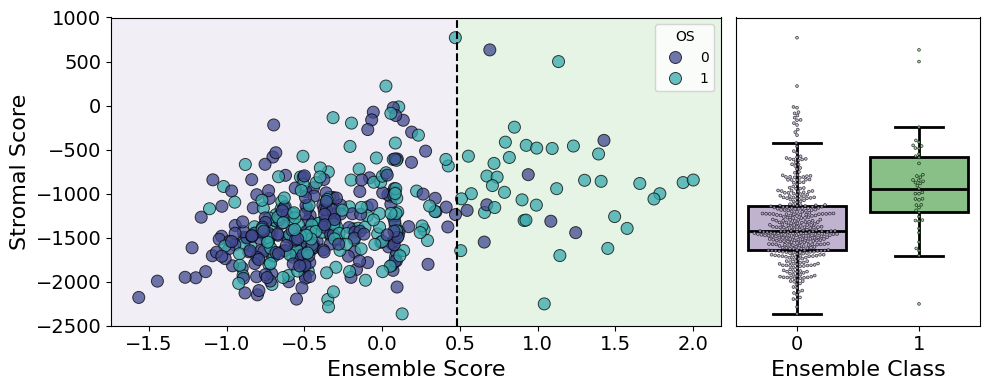

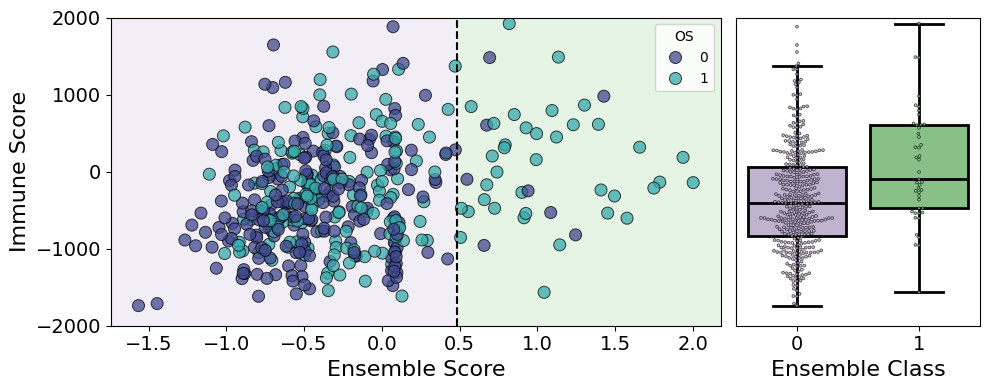

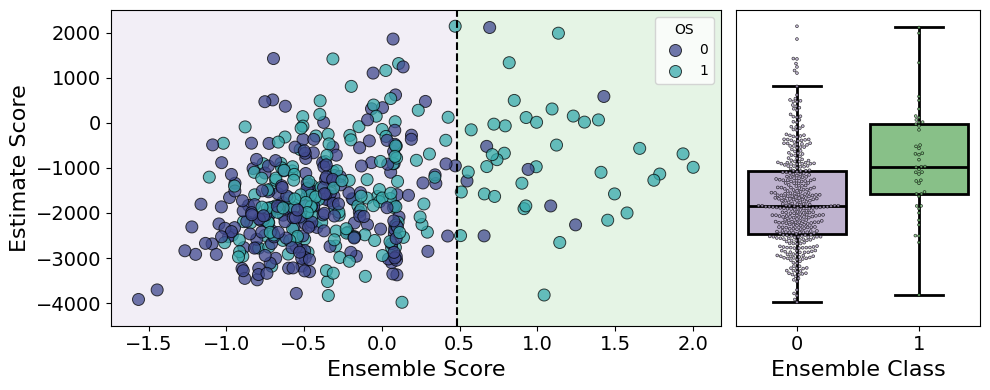

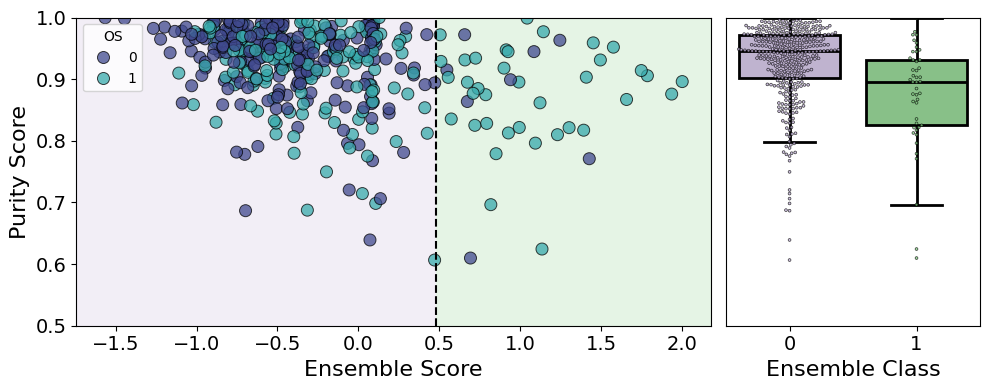

In [202]:
for param in ["stromal","immune","estimate","purity"]:

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4),gridspec_kw={'width_ratios': [2.5, 1]})
    ax1 = sns.scatterplot(est_res_df,x="prob_Ensemble",y=param,hue="OS",palette="mako",edgecolor="black",alpha=0.75,s=75,ax=ax1)
    ax1.axvline(x=0.48,c="black",linestyle="--")
    ax1.add_patch(patches.Rectangle((0.48,2500),2,-10000,facecolor="#7FC97F",alpha=0.2,zorder=0))
    ax1.add_patch(patches.Rectangle((-2,2500),2.48,-10000,facecolor="#BEAED4",alpha=0.2,zorder=0))
    ax1.tick_params(axis="both",labelsize=14)
    ax1.set_xlabel("Ensemble Score",fontsize=16)
    if param == "stromal":
        y_name = "Stromal Score"
        ax1.set_ylim((-2500,1000))
    elif param == "immune":
        y_name = "Immune Score"
        ax1.set_ylim((-2000,2000))
    elif param == "estimate":
        y_name = "Estimate Score"
        ax1.set_ylim((-4500,2500))
    elif param == "purity":
        y_name = "Purity Score"
        ax1.set_ylim((0.5,1))
    ax1.set_ylabel(y_name,fontsize=16)
    
    ax2 = sns.boxplot(est_res_df,x="pred_Ensemble",y=param,hue="pred_Ensemble",palette="Accent",legend=False,zorder=0,fliersize=0,linewidth=2,linecolor="black",hue_order=[1,0],ax=ax2)
    ax2 = sns.swarmplot(est_res_df, x="pred_Ensemble",y=param,s=2,hue="pred_Ensemble",palette="Accent",edgecolor="black",linewidth=0.5,alpha=0.75,zorder=1,legend=False,hue_order=[1,0],ax=ax2)
    ax2.tick_params(axis="both",labelsize=14)
    ax2.set_xlabel("Ensemble Class",fontsize=16)
    ax2.set_ylabel("",fontsize=16)
    plt.yticks(ticks=[], labels=[])
    if param == "stromal":
        ax2.set_ylim((-2500,1000))
    elif param == "immune":
        ax2.set_ylim((-2000,2000))
    elif param == "estimate":
        ax2.set_ylim((-4500,2500))
    elif param == "purity":
        ax2.set_ylim((0.5,1))

    fig.tight_layout()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 purity   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     48.42
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.34e-11
Time:                        15:35:50   Log-Likelihood:                 559.09
No. Observations:                 420   AIC:                            -1114.
Df Residuals:                     418   BIC:                            -1106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9116      0.003    268.518      0.000       0.905       0.918
prob_Ensemble    -0.0369      0.005     -6.958      0.000      -0.047      -0.026
==============================================================================
Omnibus:                      138.983   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.764
Skew:                          -1.584   Prob(JB):                     8.50e-86
Kurtosis:                       6.514   Cond. No.                         1.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""